# Clustering Pixels in WSI Using MiniBatch KMeans 

**Gagan Daroach** 

In [15]:
import os
import cv2
import tensorflow as tf
import numpy as np
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline
from matplotlib import pyplot as plt
from datetime import datetime

In [19]:
def create_image_mask(img):
    img_pixel_list = img.reshape((img.shape[0] * img.shape[1], 3))
    cluster = MiniBatchKMeans(2, tol=0.2)
    cluster.fit(img_pixel_list.astype('uint8'))
    pixel_labels = cluster.labels_
    img_mask = pixel_labels.reshape((img.shape[0],img.shape[1]))
    return img_mask

def plot_image_and_mask(img):
    img_mask = create_image_mask(img)
    
    fig, ax = plt.subplots(1,2, figsize=(20,10))
        
    ax[0].imshow(img)
    ax[1].imshow(img_mask)
    plt.title('Image (Left) and Mask (Right)')
    plt.show()

## Clustering on MCW WSI

~ 400mb each

In [20]:
mcw_wsi_dir = '/srv/tank/mcw/wsi'

211_13.tiff


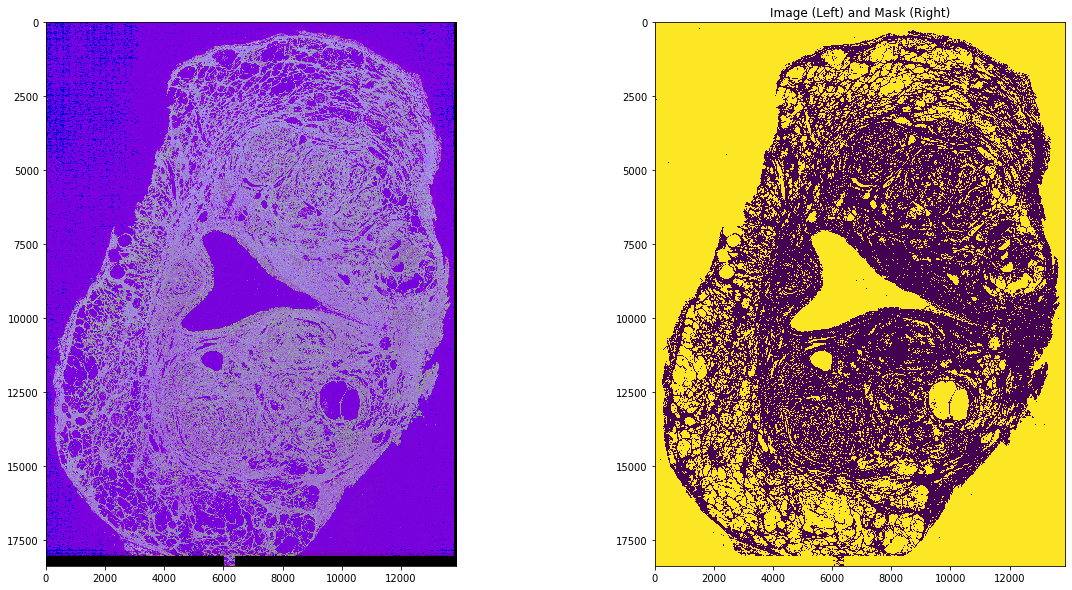

time elapsed: 1011
145_11.tiff


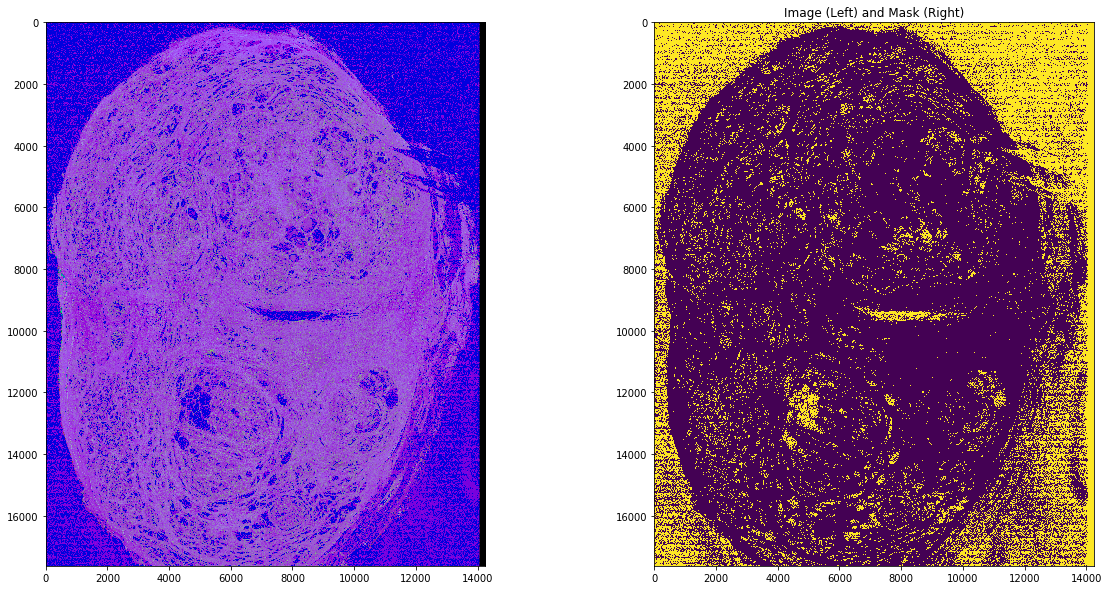

time elapsed: 973
146_7.tiff


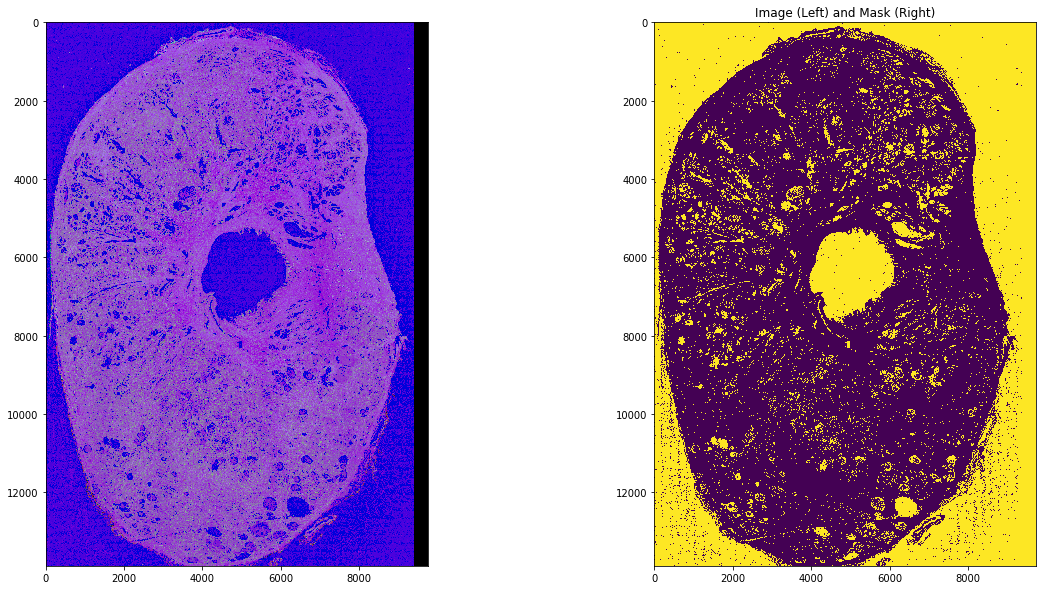

time elapsed: 517


In [21]:
for subdir, dirs, files in os.walk(mcw_wsi_dir):
    for file in files:
        filepath = os.path.join(subdir, file)
        img = cv2.imread(filepath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        print(file)
        start_time = datetime.now()
        plot_image_and_mask(img)
        run_time = datetime.now() - start_time
        print(f'time elapsed: {run_time.seconds}')